<a href="https://colab.research.google.com/github/JanMusa/Invoice-Delay-Model/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

sns.set(style="whitegrid")


In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print("Target classes:", iris.target_names)
print(df['target'].value_counts())


Target classes: ['setosa' 'versicolor' 'virginica']
target
0    50
1    50
2    50
Name: count, dtype: int64


In [4]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [5]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [6]:
y_pred = model.predict(X_test)


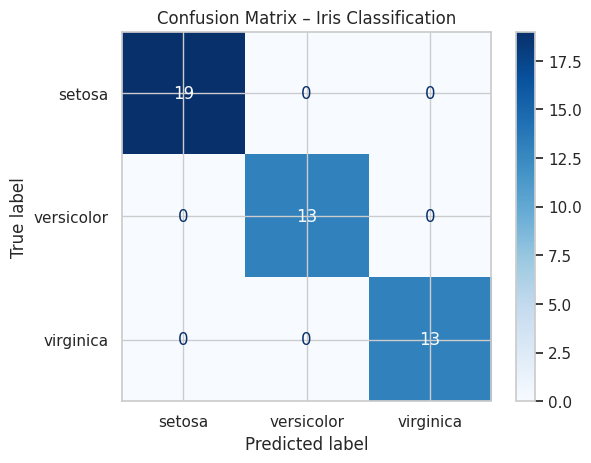

In [7]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Iris Classification")
plt.show()


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))


Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1-score (macro): 1.0


In [9]:
print(
    classification_report(
        y_test,
        y_pred,
        target_names=iris.target_names
    )
)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [10]:
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9733333333333334
Standard Deviation: 0.02494438257849294
